In [182]:
import math
import json
import pandas as pd
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

In [183]:
def circles(x, y, s, c='b', vmin=None, vmax=None, **kwargs):
    """
    https://stackoverflow.com/questions/9081553/python-scatter-plot-size-and-style-of-the-marker/24567352#24567352
    """
    if np.isscalar(c):
        kwargs.setdefault('color', c)
        c = None
    if 'fc' in kwargs: kwargs.setdefault('facecolor', kwargs.pop('fc'))
    if 'ec' in kwargs: kwargs.setdefault('edgecolor', kwargs.pop('ec'))
    if 'ls' in kwargs: kwargs.setdefault('linestyle', kwargs.pop('ls'))
    if 'lw' in kwargs: kwargs.setdefault('linewidth', kwargs.pop('lw'))

    patches = [Circle((x_, y_), s_) for x_, y_, s_ in np.broadcast(x, y, s)]
    collection = PatchCollection(patches, **kwargs)
    if c is not None:
        collection.set_array(np.asarray(c))
        collection.set_clim(vmin, vmax)

    ax = plt.gca()
    ax.add_collection(collection)
    ax.autoscale_view()
    if c is not None:
        plt.sci(collection)
    return collection

def calcSlope(x1,y1,x2,y2):
    if x1 == x2 and y1 == y2:
        return "NaL"
    elif x1 == x2:
        return "vertical"
    elif y1 == y2:
        return "horizontal"
    else:
        return round((y2-y1)/(x2-x1),4)

def calcDistance(x1,y1,x2,y2): 
    """
    determine the distance between 2 points on a coordinate plane
    """
    return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2),4)

def calcCost(distance):
    """
    determine the cost of the movement according to the rules:
    Each swing costs the particle $D^-2, where D is the straight-line distance of the length of rope used for that particular swing.
    """
    return round(pow(distance, -2),4)

def plotPathToss(x1,y1,x2,y2):
    # plot points
    ax.plot(x1, y1, 'bo')
    ax.plot(x2, y2, 'bo')
    # plot line
    ax.plot([x1, x2],[y1, y2],'b-')
    d = calcDistance(x1, y1, x2, y2)
    # print("Distance: {0:.4f}".format(d))
    # print("Cost: {0:.4f}".format(calcCost(d)))
    # print("Sum of Squares: {0:.4f}".format(sumOfSquares(d)))
    # circles(x2, y2, d, alpha=0.2, lw=5, edgecolor='b')
    return d

def plotPathSwing(x1,y1,x2,y2,remaining):
    # plot points
    ax.plot(x1, y1, 'ro')
    ax.plot(x2, y2, 'ro')
    # plot line
    ax.plot([x1, x2],[y1, y2],'r-')
    d = calcDistance(x1, y1, x2, y2)
    d = remaining-d
    print(d)
    if d > 0:
        circles(x2, y2, d, alpha=0.2, lw=5, edgecolor='b')
    return d

def sumOfSquares(n):
    return sum([i**2 for i in range(1, math.floor(n) + 1)])

5.0
2.0
-3.0
5.0
0.0
1.0
0.0
0.0


(0, 20)

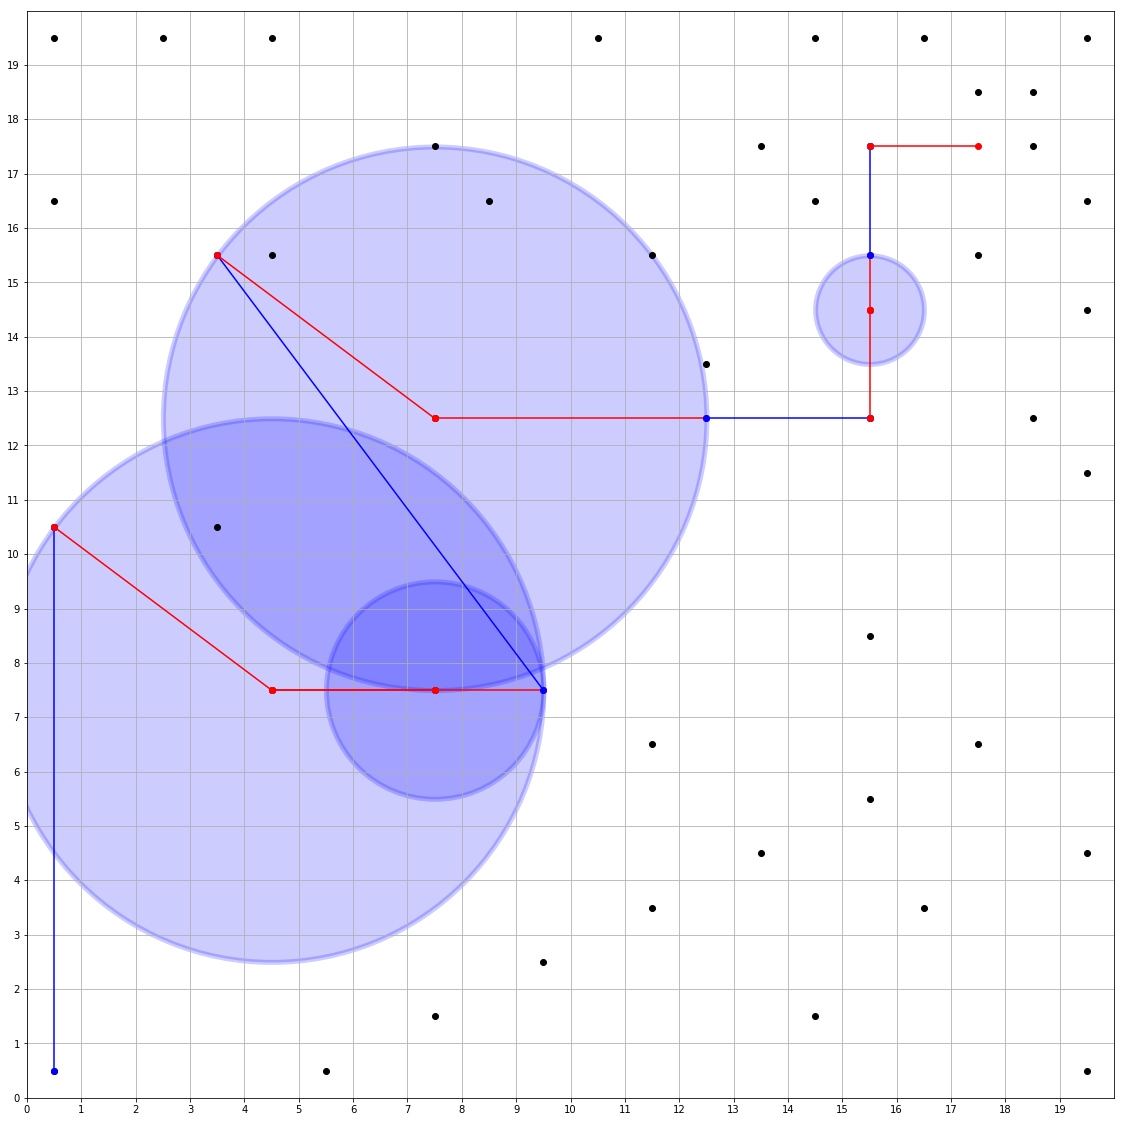

In [242]:
figure(figsize=(20,20))
ax=subplot(aspect='equal')
coords = [(0.5, 0.5), (2.5, 19.5), (4.5, 19.5), (10.5, 19.5), (14.5, 19.5), (16.5, 19.5), (19.5, 19.5), (17.5, 18.5), (18.5, 18.5), (7.5, 17.5), (13.5, 17.5), (15.5, 17.5), (18.5, 17.5), (0.5, 16.5), (8.5, 16.5), (14.5, 16.5), (19.5, 16.5), (3.5, 15.5), (4.5, 15.5), (11.5, 15.5), (17.5, 15.5), (15.5, 14.5), (19.5, 14.5), (12.5, 13.5), (7.5, 12.5), (15.5, 12.5), (18.5, 12.5), (19.5, 11.5), (0.5, 10.5), (3.5, 10.5), (15.5, 8.5), (4.5, 7.5), (7.5, 7.5), (11.5, 6.5), (17.5, 6.5), (15.5, 5.5), (13.5, 4.5), (19.5, 4.5), (11.5, 3.5), (16.5, 3.5), (9.5, 2.5), (7.5, 1.5), (14.5, 1.5), (0.5, 19.5), (5.5, 0.5), (19.5, 0.5)]

# plot all coordinates
[ax.plot(i[0], i[1], 'ko') for i in coords]
    
# move 1
r = plotPathToss(.5,.5, .5,10.5)
r = plotPathSwing(.5,10.5, 4.5,7.5,r)
r = plotPathSwing(4.5,7.5, 7.5,7.5,r)
plotPathSwing(4.5,7.5, 9.5,7.5,r)


# move 2
r = plotPathToss(9.5,7.5, 3.5,15.5)
r = plotPathSwing(3.5,15.5, 7.5,12.5, r)
plotPathSwing(7.5,12.5, 12.5,12.5, r)

# move 3
r = plotPathToss(12.5,12.5, 15.5,12.5)
r = plotPathSwing(15.5,12.5, 15.5,14.5, r)
r = plotPathSwing(15.5,14.5, 15.5,15.5, r)

# move 4
r = plotPathToss(15.5,15.5, 15.5,17.5)
r = plotPathSwing(15.5,17.5, 17.5,17.5, r)


ax.set_xticks(np.arange(0, 20, 1))
ax.set_yticks(np.arange(0, 20, 1))
plt.grid()
xlim(0,20)
ylim(0,20)

In [189]:
print(calcDistance(9.5, 7.5, 3.5, 15.5))

10.0


In [208]:
print(calcDistance(.5,.5,.5,1.5))
print(calcDistance(.5,.5,1.5,1.5))
print(calcDistance(.5,.5,.5,1.5))
print(calcDistance(.5,.5,1.5,1.5))

1.0
1.4142
